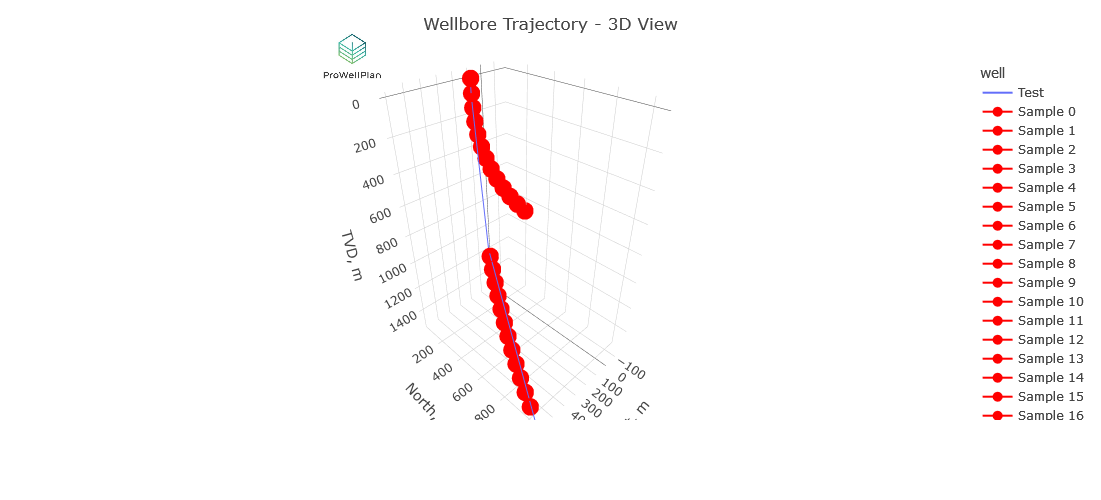

In [28]:
import well_profile as wp
import pandas as pd
import plotly.graph_objects as go

# File import
path = 'test well data'
collar = 'Collar GUI.csv'
survey = 'Survey GUI.csv'
sample = 'Sample GUI.csv'

collar = pd.read_csv(f'{path}/{collar}')
sample = pd.read_csv(f'{path}/{sample}')

# Get long and lat of start points
for key in collar.keys():
    if 'latitude' in key.lower():
        lat = collar[key]
    elif 'longitude' in key.lower():
        long = collar[key]

# Get depth of samples
for key in sample.keys():
    if 'top' in key.lower():
        depth = sample[key]

# Make well then plot
well = wp.load(f'{path}/{survey}',   
                units='metric',  # (optional) define system of units 'metric' for meters or 'english' for feet
                set_start={'north': lat[0], 'east': long[0], 'depth': 0})  # (optional) set the location of initial point

fig = well.plot(names=['Test'])

# Plot samples
depth = range(0, 2000, 80)
for i, s in enumerate(depth):
    pt = well.get_point(s, 'md')
    y = pt['north']
    x = pt['east']
    z = pt['tvd']
    fig.add_trace(
        go.Scatter3d(x=[x], y=[y], z=[z], 
                     marker=dict(color='red',size=10),
                     name=f'Sample {i}'))

# Show fig
fig.update_layout(autosize=False, width=700, height=500)
fig.show()
